# An Exploration of Lethal Outcomes in Cases of Myocardial Infarction

#### <center>Yi-Jin Chen, John Arnn, Luis Alegria</center>

### <center>Introduction</center>

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Myocardial infarctions (MI), commonly referred to as heart attacks, occur after a blockage in the blood vessels supplying oxygen to heart muscles. This medical condition is considered life-threatening, and individuals not administered medical treatments promptly can have lethal outcomes. Certain risk factors and conditions predispose individuals to suffer heart attacks. These include hypertension, cigarette smoking, type II diabetes, and a sedentary lifestyle (1). In the United States, an estimated 805,000 individuals suffer a heart attack annually, and 1 in 5 may not perceive that they have suffered one (2). Given that heart attacks are prevalent and can lead to loss of life, it is essential to determine factors and medical treatments that can reduce the possibility of a lethal outcome. <br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Our group chose to analyze a data set collected by Golovenkin et al. to explore MI using machine learning methods (3). This set contains information for MI patients seen at Krasnoyarsk Interdistrict Clinical Hospital in Russia from 1992-1995. It consists of 111 features, excluding the ID column, and 12 outcomes. Of the 111 features, nine were collected at various time points after hospital admission. For the outcomes, 11 have binary classes while one, lethal outcome,  has eight classes. The main objective of the analysis will be to use the features at the time of admission to classify lethal outcome after transformation into a binary class.

### <center> Imports </center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import warnings 

warnings.filterwarnings("ignore")

### <center> Data Preparation </center>

To prepare the data set for analysis the following are performed:
- drop ID column
- drop features recorded after patient admission to hospital
- drop outcomes not related to mortality
- convert mortality outcome from multi-class to binary class.

In [2]:
# Read CSV file containing the data.

mi = pd.read_csv('Myocardial infarction complications Database.csv')

In [3]:
# In its raw state, the data set contains 1700 instances with 124 columns. 

mi.shape

(1700, 124)

In [4]:
# First few entries of the set# ID, features after admission, 
# and any outcome not lethal outcome needs to be removed

# features after admission : First three are for pain relapse, second three for use
# opioids in the ICU, last three for use of NSAIDs

# Outcomes to be dropped: Atrial fibrillation, Supraventricular tachycardia, 
# Ventricular tachycardia, Ventricular fibrillation, Third-degree AV block,
# Pulmonary edema, Myocardial rupture, Dressler syndrome, Chronic heart failure,
# Relapse of the myocardial infarction, Post-infarction angina

#list of column labels to be dropped
drop_columns = ['ID',
               'R_AB_1_n', 'R_AB_2_n', 'R_AB_3_n', 'NA_R_1_n', 'NA_R_2_n',
               'NA_R_3_n', 'NOT_NA_1_n', 'NOT_NA_2_n', 'NOT_NA_3_n',
               'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK',
               'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN']

mi = mi.drop(columns = drop_columns)

# after the drops, there is 102 features and the outcome
mi.shape

(1700, 103)

In [5]:
# outcome has eight classes
mi['LET_IS'].value_counts()

0    1429
1     110
3      54
7      27
6      27
4      23
2      18
5      12
Name: LET_IS, dtype: int64

In [6]:
# turn outcome into binary class with 0 <- alive 1 <- deceased

mi = mi.replace({'LET_IS': [i for i in range(1, 8)]}, 1)
mi['LET_IS'].value_counts()

0    1429
1     271
Name: LET_IS, dtype: int64

In [7]:
mi.head()

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,LID_KB,NITR_S,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,LET_IS
0,77.0,1,2.0,1.0,1.0,2.0,NaN,3.0,0.0,7.0,...,NaN,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,NaN,2.0,0.0,2.0,...,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,NaN,2.0,0.0,3.0,...,NaN,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
4,60.0,1,0.0,0.0,0.0,2.0,NaN,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0


### <center> Descriptive Statistics and Missing Values </center>

In this section the aim is to explore the dataset using descriptive statistics and visualizations as well as investigate missing values in the data set.

In [8]:
# Separate the data into featurea and outcome or target

X = mi.drop(columns = ['LET_IS'])
y = mi['LET_IS']

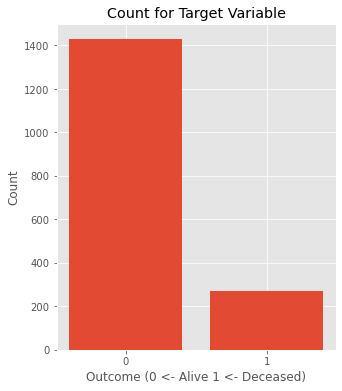

In [9]:
# bar plot to visualize counts of outcome values
# The plot shows that the data is unbalanced

fig, ax = plt.subplots(figsize = (5, 6))
ax.bar(x = [0, 1], height = y.value_counts())
ax.set_xticks([0, 1])
ax.set_xlabel('Outcome (0 <- Alive 1 <- Deceased)')
ax.set_ylabel('Count')
ax.set_title('Count for Target Variable')
plt.show()

In [10]:
# There are many features are not numeric, because they use number to classify. 
# They're actually categorical features.
# Binary data was treated as categorical data; ordinal data was treated as continuous variables (numerical) for simpler interpretation. 
# Reason from: https://www3.nd.edu/~rwilliam/stats3/OrdinalIndependent.pdf

# List to hold integer values of columns with numerical features
features = [0, *range(2,6), 7, 9, 10, *range(33,37), *range(43,47), 82, *range(84,91)]

# List to hold integer values of columns with categorical values
categories = [i for i in range(X.columns.size) if not (i in features)]

# locate all numerical features
numfeatures = X.iloc[:, features]

# locate all categorical features
catfeatures = X.iloc[:, categories]

# Print the total number in each category
print('The total number of numerical features:', len(numfeatures.columns))
print('The total number of categorical features:', len(catfeatures.columns))

The total number of numerical features: 24
The total number of categorical features: 78


In [11]:
# Describe method on the numerical features
numfeatures.describe()

,AGE,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,GB,DLIT_AG,ZSN_A,S_AD_KBRIG,D_AD_KBRIG,...,inf_im,post_im,K_BLOOD,NA_BLOOD,ALT_BLOOD,AST_BLOOD,KFK_BLOOD,L_BLOOD,ROE,TIME_B_S
count,1692.000000,1696.000000,1594.000000,1627.000000,1649.000000,1691.000000,1452.000000,1646.000000,624.000000,624.000000,...,1620.000000,1628.000000,1329.000000,1325.000000,1416.000000,1415.000000,4.000000,1575.000000,1497.000000,1574.000000
mean,61.856974,0.554835,2.316186,1.205286,1.160703,1.393258,3.340220,0.194411,136.907051,81.394231,...,1.014815,0.259214,4.191422,136.550943,0.481455,0.263717,2.000000,8.782914,13.444890,4.684244
std,11.259936,0.836801,2.440586,1.040814,0.801400,1.088803,3.098646,0.658722,34.997835,19.745045,...,1.404934,0.698850,0.754076,6.512120,0.387261,0.201802,1.095445,3.400557,11.296316,2.871044
min,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.300000,117.000000,0.030000,0.040000,1.200000,2.000000,1.000000,1.000000
25%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,120.000000,70.000000,...,0.000000,0.000000,3.700000,133.000000,0.230000,0.150000,1.350000,6.400000,5.000000,2.000000
50%,63.000000,0.000000,1.000000,2.000000,1.000000,2.000000,3.000000,0.000000,140.000000,80.000000,...,0.000000,0.000000,4.100000,136.000000,0.380000,0.220000,1.600000,8.000000,10.000000,4.000000
75%,70.000000,1.000000,5.000000,2.000000,2.000000,2.000000,7.000000,0.000000,160.000000,90.000000,...,2.000000,0.000000,4.600000,140.000000,0.610000,0.330000,2.250000,10.450000,18.000000,7.000000
max,92.000000,3.000000,6.000000,4.000000,2.000000,3.000000,7.000000,4.000000,260.000000,190.000000,...,4.000000,4.000000,8.200000,169.000000,3.000000,2.150000,3.600000,27.900000,140.000000,9.000000


*Discussion of Numerical Features Statistics:* The mean age of the individuals in this data set is 61.9. The next four features for a patient (INF_ANAM, STENOK_AN, FK_STENOK, IBS_POST) are the number of MIs they have experienced, if they experienced chest pain upon exertion, the functional class of the chest pain, and whether there was coronary heart disease before hospital admission.  

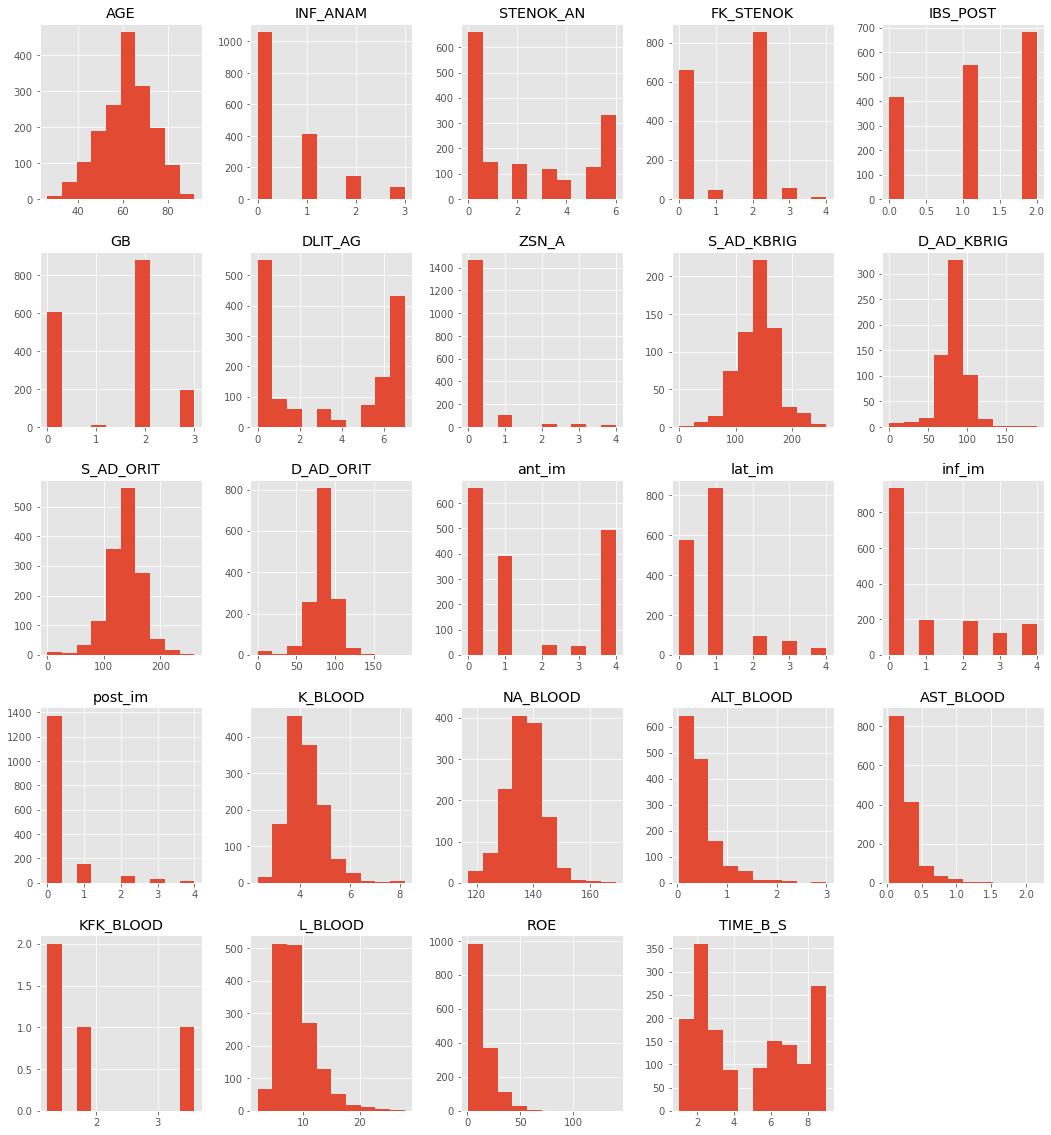

In [12]:
# Histogram for numerical features
X[numfeatures.columns].hist(figsize=(18,20))
plt.show()

*Discussion of Histograms of Numerical Features:* 

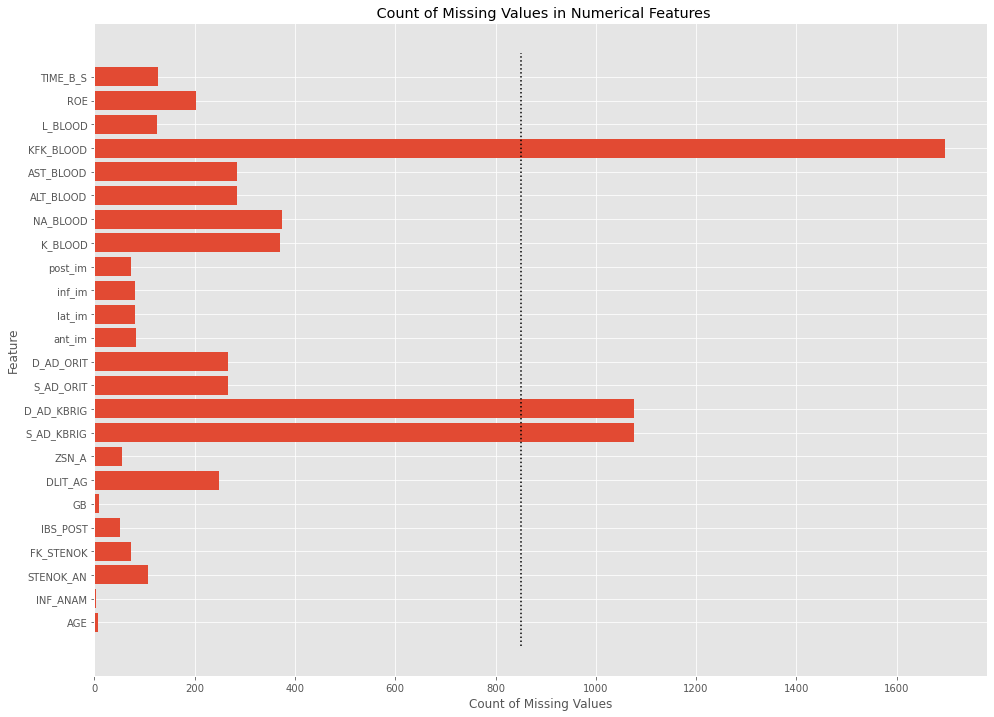

In [13]:
# Visualization of missing values in the dats set with a horizontal bar plot
# Any feature with > 50% missing values will be dropped. 

# Count of missing values.
na_count = X[numfeatures.columns].isnull().sum()
# list to hold values 0-23
marks = [i for i in range(0, len(na_count))]

fig, ax = plt.subplots(figsize = (16, 12))
ax.barh(y = marks, width = na_count.values)
ax.set_yticks(marks)
ax.set_yticklabels(na_count.index)
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Feature')
ax.set_title(' Count of Missing Values in Numerical Features')
plt.vlines(x = 1700 / 2, ymin = -1 , ymax = 24, color = 'black',
          linestyles = 'dotted')
plt.show()

The features S_AD_KBRIG, D_AD_KBRIG, and KFK_Blood will be dropped since they have greater than 50% missing values.

In [14]:
# Drop the features mentioned in the cell above
newnumfeatures = numfeatures.loc[:, (numfeatures.isnull().sum(axis=0) < 1700/2)]

To explore if any of the numerical features are correlated a heat map is used. 

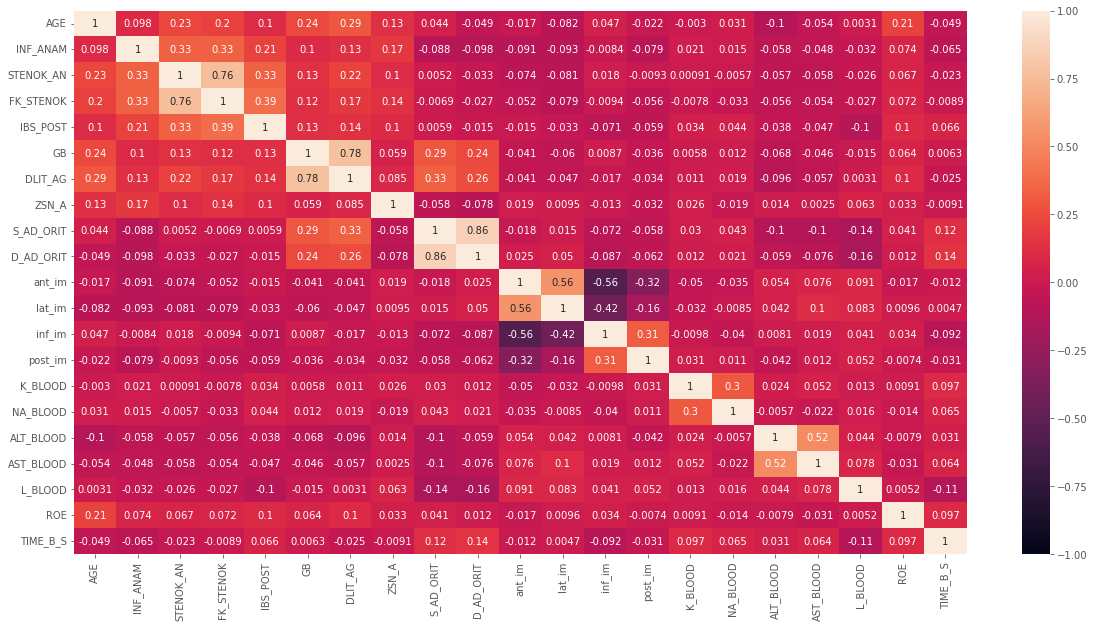

In [15]:
#Show the correlations between each two numeric variables; it seems not multi-co-linearity

plt.figure(figsize=(20,10))
cors = X[newnumfeatures.columns].corr()
sns.heatmap(cors, vmin=-1, vmax=1, annot=True)
plt.show()

*Analysis of Heatmap:*

To look at missing values for categorical features a horizontal bar plot will also be used. 

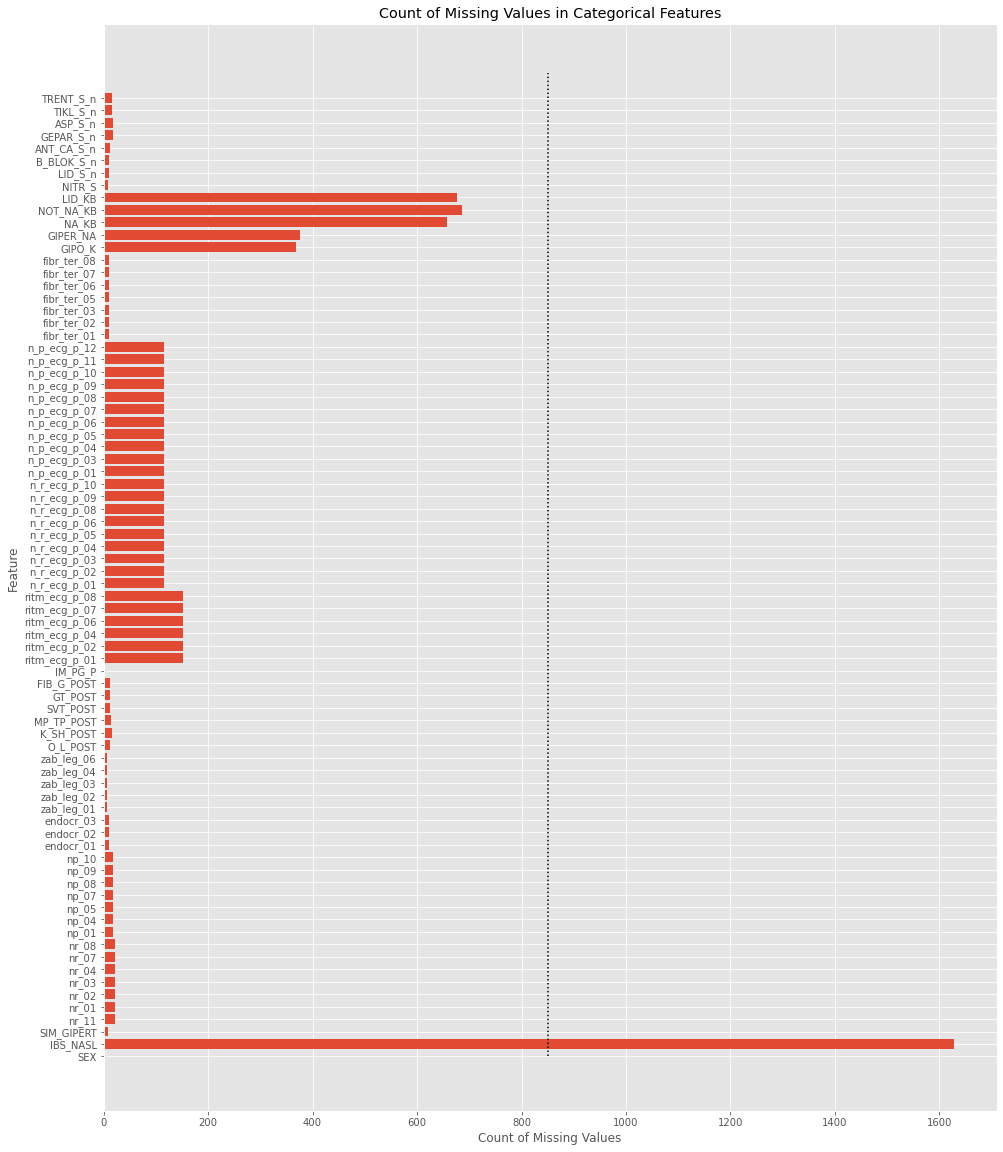

In [16]:
# Visualization of missing values in the dats set with a horizontal bar plot
# Any feature with > 50% missing values will be dropped. 

# Count of missing values.
na_count_cat = X[catfeatures.columns].isnull().sum()
# list to hold values 0-23
marks_cat = [i for i in range(0, len(na_count_cat))]

fig, ax = plt.subplots(figsize = (16, 20))
ax.barh(y = marks_cat, width = na_count_cat.values)
ax.set_yticks(marks_cat)
ax.set_yticklabels(na_count_cat.index)
ax.set_xlabel('Count of Missing Values')
ax.set_ylabel('Feature')
ax.set_title('Count of Missing Values in Categorical Features')
plt.vlines(x = 1700 / 2, ymin = 0 , ymax = 79, color = 'black',
          linestyles = 'dotted')
plt.show()

Since the feature IBS_NASL has >50% missing values, it will be dropped. 

In [17]:
# Drop the feature mentioned above.
newcatfeatures = catfeatures.loc[:, (catfeatures.isnull().sum(axis=0) < 1700/2)]

### <center>Sources</center>
<br>
1. Heart Attack. Johns Hopkins Medicine. Accessed October 8, 2021. https://www.hopkinsmedicine.org/health/conditions-and-diseases/heart-attack
<br>
<br>
2. Heart Disease Facts. Centers for Disease Control and Prevention. Accessed October 9, 2021. https://www.cdc.gov/heartdisease/facts.htm
<br>
<br>
3. Golovenkin, S.E.; Gorban, Alexander; Mirkes, Evgeny; Shulman, V.A.; Rossiev, D.A.; Shesternya, P.A.; et al. (2020): Myocardial infarction complications Database. University of Leicester. Dataset. https://doi.org/10.25392/leicester.data.12045261.v3 